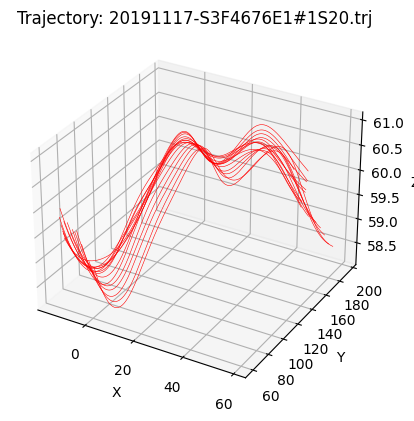

In [1]:
# Import other necessary modules here
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Define the read_trj_data function here
from trj_data_utils import read_trj_data

# Set the filename
filename = "20191117-S3F4676E1#1S20.trj"

# Read the trajectory data
data = read_trj_data(filename)

# Create the 3D plot
ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=-60)

# Plot the trajectories
for trj in data:
    if len(trj) < 10:
        continue
    X = []
    Y = []
    Z = []
    for x in trj:
        X.append(x[2])
        Y.append(x[3])
        Z.append(x[4])
    ax.plot3D(X, Y, Z, 'red', linewidth=0.4)

# Set the plot title and labels
ax.set_title('Trajectory: ' + filename)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.grid(True)
plt.show()


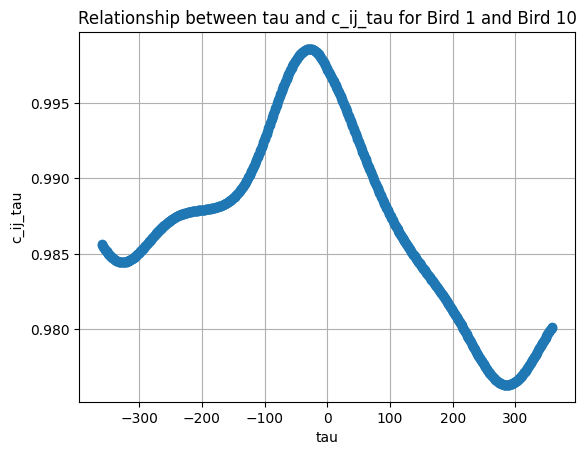

In [2]:
from correlation_delay import calculate_correlation_pairs_multiple_tau, calculate_directional_correlation_delay

bird_i = 1  # Index of bird i
bird_j = 10  # Index of bird j
tau_values = list(range(-60*6, 60*6, 1))  # List of tau values from -60*6 to 60*6 with interval of 10

# calculate_directional_correlation_delay(data, bird_i, bird_j, 0)

c_ij_values = calculate_correlation_pairs_multiple_tau(data, bird_i, bird_j, tau_values)[bird_i, bird_j]

plt.plot(tau_values, c_ij_values, marker='o')
plt.xlabel('tau')
plt.ylabel('c_ij_tau')
plt.title(f'Relationship between tau and c_ij_tau for Bird {bird_i} and Bird {bird_j}')
plt.grid(True)
plt.show()


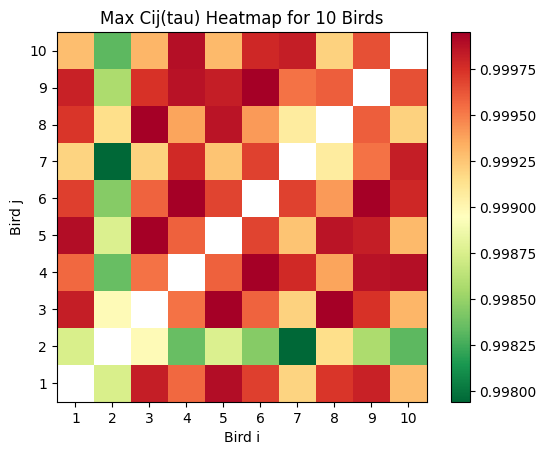

In [6]:
import numpy as np

num_birds = 10  # Number of birds
tau_values = list(range(-60*3, 60*3, 1))  # List of tau values from -60*3 to 60*3 with interval of 1

# Create a 2D numpy array to store the maximum Cij(tau) values
heatmap_data = np.zeros((num_birds, num_birds))

# Calculate the maximum Cij(tau) values for each pair of birds
for bird_i in range(num_birds):
    for bird_j in range(bird_i + 1, num_birds):
        correlation_pairs = calculate_correlation_pairs_multiple_tau(data, bird_i, bird_j, tau_values)
        c_ij_values = correlation_pairs[(bird_i, bird_j)]
        max_c_ij_tau = max(c_ij_values)
        heatmap_data[bird_i, bird_j] = max_c_ij_tau
        heatmap_data[bird_j, bird_i] = max_c_ij_tau  # Fill in the symmetric entry

# Set the diagonal elements to NaN to exclude them from colormap
np.fill_diagonal(heatmap_data, np.nan)

# Define the minimum and maximum values of the heatmap excluding NaN values
vmin = np.nanmin(heatmap_data)
vmax = np.nanmax(heatmap_data)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the heatmap using the 'imshow' function and specify colormap and normalization range
heatmap = ax.imshow(heatmap_data[::-1, :], cmap='RdYlGn_r', vmin=vmin, vmax=vmax)

# Add a colorbar to the heatmap
cbar = plt.colorbar(heatmap)

# Set the x-axis and y-axis labels
ax.set_xticks(np.arange(num_birds))
ax.set_yticks(np.arange(num_birds))
ax.set_xticklabels(np.arange(num_birds) + 1)
ax.set_yticklabels(np.arange(num_birds, 0, -1))  # Reverse the y-axis labels
plt.xlabel('Bird i')
plt.ylabel('Bird j')

# Set the title of the plot
plt.title(f'Max Cij(tau) Heatmap for {num_birds} Birds')

# Display the plot
plt.show()